In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Load the dataset weatherHistory.csv

In [4]:
df=pd.read_csv('weatherHistory.csv')

### Get rid of non-numerical columns of the dataset

In [5]:
df=df.drop(["Formatted Date","Summary","Precip Type",'Daily Summary'],axis=1)

In [6]:
df.columns

Index(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Loud Cover', 'Pressure (millibars)'],
      dtype='object')

### Use 'Temperature (C)' as your target variable. Plot the relationship of each of the numerical features with the target variable

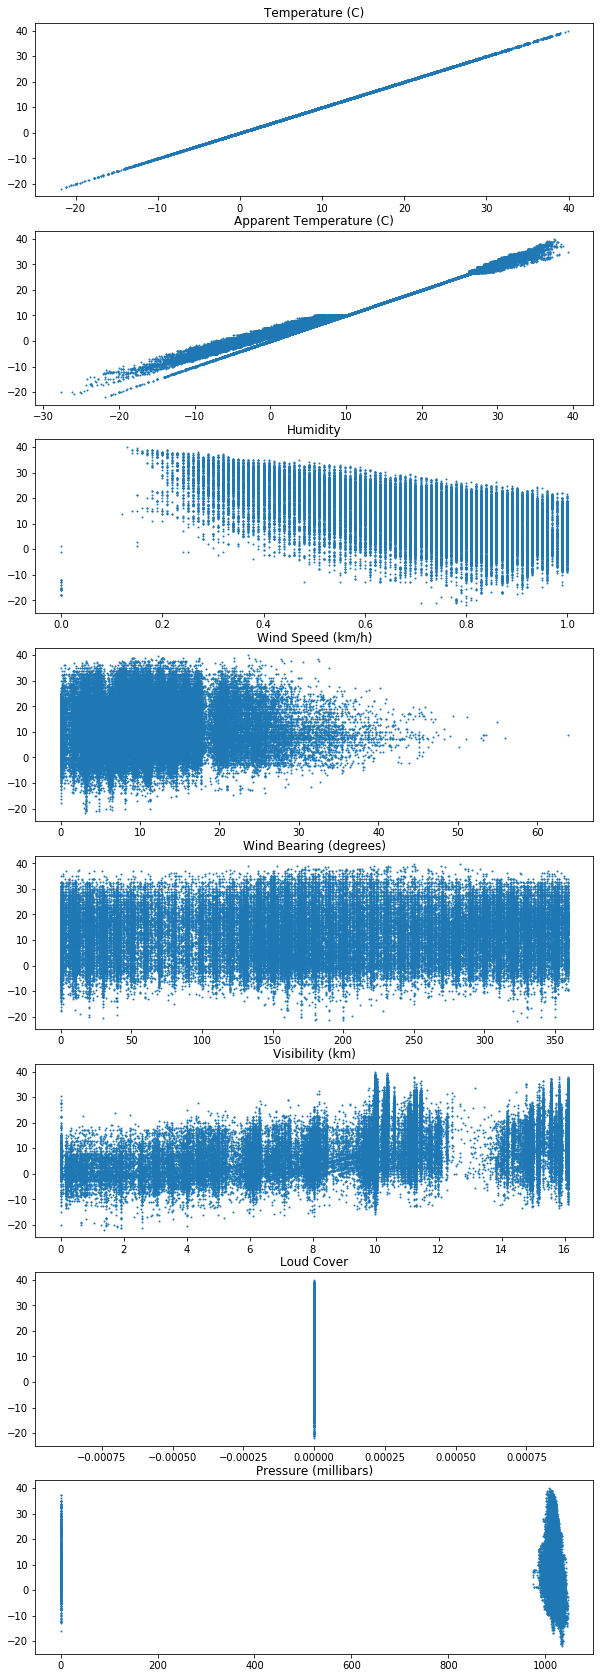

In [7]:
fig,axs = plt.subplots(len(df.columns),figsize=(10,30))
for i in range(len(df.columns)):
    axs[i].set_title(df.columns[i])
    axs[i].scatter(df[df.columns[i]],df['Temperature (C)'],s=1)

In [8]:
df.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,NaN,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,NaN,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,NaN,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,NaN,-0.049263
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,NaN,-0.011651
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,NaN,0.059818
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,NaN,1.000000


### Divide the dataset into training and test sets with the ratio 80:20.

In [9]:
(x_train,x_test,y_train,y_test)=train_test_split(df["Humidity"],df["Temperature (C)"],test_size=0.1)

### Implement a function fit_ridge_regression¶

In [10]:
def fit_ridge_regression(data_vector, response_vector, l=1):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :param l: ridge variable
    :return: numpy array beta of coefficients of the regression
    """
    
    x=np.array([data_vector,np.ones(len(data_vector))])
    y=np.array(response_vector)
    
    coeffs=np.linalg.inv(x.dot(x.T)+l*np.identity(2)).dot(x.dot(y))
    
    
    return coeffs

### Implement a function fit_polynomial_regression

In [11]:
def fit_polynomial_regression(data_vector, response_vector, degree=2):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    """
    data=[]
    for i in range(degree+1):
        data.append(np.array(data_vector)**i)
        
    x=np.array(data)
    y=np.array(response_vector)
    
    coeffs=np.linalg.inv(x.dot(x.T)).dot(x.dot(y))
    
    
    return coeffs

### Use the resulting train and test sets with the previous 2 functions to fit ridge regression and polynomial regression lines.¶

In [12]:
ridge=fit_ridge_regression(x_train,y_train,l=1)

In [13]:
poly_2=fit_polynomial_regression(x_train,y_train,degree=2)

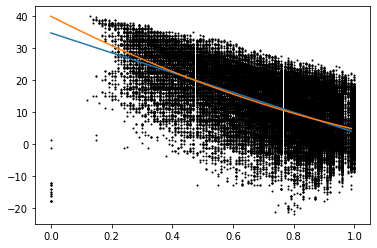

In [14]:
plt.scatter(x_train,y_train,color='black',s=1)
x=np.arange(x_train.min(),x_train.max(),0.01)
plt.plot(x,ridge[0]*x+ridge[1])
plt.plot(x,poly_2[2]*x*x+poly_2[1]*x+poly_2[0])


### Calculate RMSE (root mean squared error) for ridge and polynomial regressions

In [15]:
y_test_ridge_pred=ridge[0]*x_test+ridge[1];
y_test_poly_pred=poly_2[2]*x_test*x_test+poly_2[1]*x_test+poly_2[0];

y_train_ridge_pred=ridge[0]*x_train+ridge[1];
y_train_poly_pred=poly_2[2]*x_train*x_train+poly_2[1]*x_train+poly_2[0];

In [16]:
print(np.sqrt(metrics.mean_squared_error(y_train,y_train_poly_pred)))
print(np.sqrt(metrics.mean_squared_error(y_train,y_train_ridge_pred)))

7.3843394709217955
7.401573472184127


In [17]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_test_poly_pred)))
print(np.sqrt(metrics.mean_squared_error(y_test,y_test_ridge_pred)))

7.370525405228695
7.387191530769967


### Now fit the ridge and polynomial regressions to your data using sklearn and compare the results with your own fit_1d_linear_regression function. Use RMSE for comparison.

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

In [19]:
poly_features = PolynomialFeatures(degree=2)

In [24]:
x_train_poly = poly_features.fit_transform(np.array(x_train).reshape(-1,1))

In [27]:
poly_model=LinearRegression()

In [28]:
poly_model.fit(x_train_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
y_test_predict_sk=poly_model.predict(poly_features.fit_transform(np.array(x_test).reshape(-1,1)))

In [40]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_test_poly_pred)))
print(np.sqrt(metrics.mean_squared_error(y_test,y_test_predict_sk)))

7.370525405228695
7.370525405228718
